In [6]:
from data_handlers import StockHistDataHandler,ComputeSuite
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import xarray as xr
data_handler = StockHistDataHandler()

In [7]:
tickers = data_handler(sql = "select ticker from securities").values.ravel()
ts_range = ["2010-01-05", "2020-01-20"]
selected_tickers = tickers
all_data = data_handler.get_data(ticker = selected_tickers, invest_horizen = ts_range)

In [11]:
start_trading = "2010-01-5"
returns = ComputeSuite.pct_return(all_data.loc[:,:,start_trading:])
returns.index = all_data.loc[:,:,start_trading:].ticker
returns.columns = np.array(all_data.loc[:,:,start_trading:]["eff_date"])

In [48]:
def buy_low(x):
    if x[0]<-0.02:
        return x[1]
    else:
        return 0
buy_sig = returns.iloc[::15].rolling(2,axis=1).apply(buy_low, raw=True)


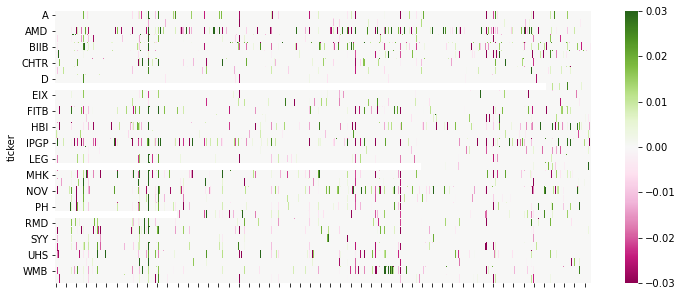

In [57]:
fig = plt.figure(figsize=(12,5))
_ = sns.heatmap(np.clip(buy_sig,-0.03,0.03),cmap="PiYG").set(xticklabels=[])


In [112]:

start_trading = "2010-01-5"



returns = ComputeSuite.pct_return(all_data.loc[:,:,start_trading:])
returns.index = all_data.loc[:,:,start_trading:].ticker
returns.columns = np.array(all_data.loc[:,:,start_trading:]["eff_date"])


thred =-0.03
selected_return = []


state_previous_selected = False*np.ones(returns.values.shape[0])
skip = 0
for t in range(skip,returns.values.shape[1]-2)[::2]:

    return_t = returns.values[:,t]
    return_t_next = returns.values[:,t+1]
    signal = return_t<thred
    
    return_t[~signal] = None
    return_t_next[~signal] = None
    selected_return.append(return_t)
    selected_return.append(return_t_next)

    
    
selected_return  = np.array(selected_return).T  
model_return =  pd.DataFrame(selected_return[:,1:][:,::2])  

In [114]:

start_trading = "2010-01-5"



res= []
for i in range(30):
    selected_return = []
    state_previous_selected = False*np.ones(returns.values.shape[0])
    skip = i
    for t in range(skip,returns.values.shape[1]-2)[::2]:

        return_t = returns.values[:,t]
        return_t_next = returns.values[:,t+1]
        signal = return_t<thred

        return_t[~signal] = None
        return_t_next[~signal] = None
        selected_return.append(return_t)
        selected_return.append(return_t_next)



    selected_return  = np.array(selected_return).T  
    model_return =  pd.DataFrame(selected_return[:,1:][:,::2])  
    res.append(model_return.mean(axis=0).mean())

In [115]:
res

[0.0006278403942392728,
 -0.050031779107076305,
 -0.060620251088069566,
 -0.06033063201145489,
 -0.046875,
 -0.06557377049180335,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

In [ ]:
model_return.mean(axis=1).mean()

In [ ]:
0.020768991037418447

In [ ]:
np.std(returns.values.ravel()[returns.values.ravel()>-99])

In [ ]:
np.std(rt)

In [ ]:
rt = model_return.mean(axis=1)

In [ ]:
sns.distplot(ct)

In [ ]:
sns.distplot(rt[ct>40])
sns.distplot(rt[ct<25],color="g")

In [ ]:
### old code below